In [204]:
import numpy as np
import pandas as pd

# data visualization libraries:
import matplotlib.pyplot as plt
import seaborn as sns

# to ignore warnings:
import warnings
warnings.filterwarnings('ignore')

# to display all columns:
pd.set_option('display.max_columns', None)

from sklearn.model_selection import train_test_split, GridSearchCV

In [211]:
# Read train and test data with pd.read_csv():
train_data = pd.read_csv("./data/train.csv")
test_data = pd.read_csv("./data/test.csv")

In [206]:
# copy data in order to avoid any change in the original:
train = train_data.copy()
test = test_data.copy()

In [207]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [208]:
sns.barplot(x = 'Pclass', y = 'Survived', data = train);

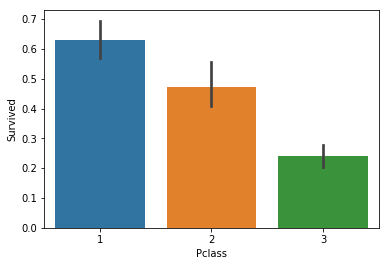

In [209]:
plt.show()

In [210]:
sns.barplot(x = 'Sex', y = 'Survived', data = train);

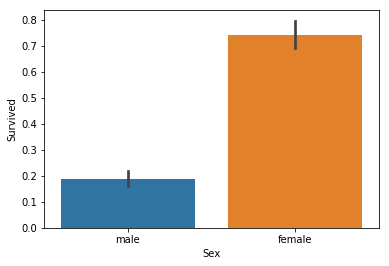

In [155]:
plt.show()

## Outlier Treatment

In [156]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [157]:
sns.boxplot(x = train['Fare']);

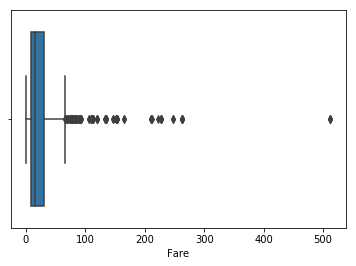

In [158]:
plt.show()

In [159]:
Q1 = train['Fare'].quantile(0.25)
Q3 = train['Fare'].quantile(0.75)
IQR = Q3 - Q1

lower_limit = Q1- 1.5*IQR
lower_limit

upper_limit = Q3 + 1.5*IQR
upper_limit

65.6344

In [160]:
train.sort_values("Fare", ascending=False).head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S


In [161]:
# In boxplot, there are too many data higher than upper limit; we can not change all. Just repress the highest value -512- 
train['Fare'] = train['Fare'].replace(512.3292, 300)

In [162]:
train.sort_values("Fare", ascending=False).head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,300.0,NaN,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,300.0,B101,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,300.0,B51 B53 B55,C
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0,C23 C25 C27,S
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0,C23 C25 C27,S


In [163]:
# We can drop the Ticket feature since it is unlikely to have useful information
train = train.drop(['Ticket'], axis = 1)
test = test.drop(['Ticket'], axis = 1)

## Missing value treatment

### Missing treatment in Age

In [164]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [165]:
train["Age"] = train["Age"].fillna(train["Age"].mean())

In [166]:
test["Age"] = test["Age"].fillna(test["Age"].mean())

In [167]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Missing treatment in embarked

In [168]:
train["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [169]:
# Fill NA with the most frequent value:
train["Embarked"] = train["Embarked"].fillna("S")

In [170]:
test["Embarked"] = test["Embarked"].fillna("S")

### Missing treatment in Fare

In [171]:
train.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [172]:
test.isnull().sum() 

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [173]:
test[test["Fare"].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,NaN,NaN,S


In [174]:
test[["Pclass","Fare"]].groupby("Pclass").mean()

,Fare
Pclass,
1,94.280297
2,22.202104
3,12.459678


In [175]:
test["Fare"] = test["Fare"].fillna(12)

### Missing treatment in Cabin

In [176]:
# Create CabinBool variable which states if someone has a Cabin data or not:

train["CabinBool"] = (train["Cabin"].notnull().astype('int'))
test["CabinBool"] = (test["Cabin"].notnull().astype('int'))

train = train.drop(['Cabin'], axis = 1)
test = test.drop(['Cabin'], axis = 1)

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,CabinBool
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,0


In [177]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
CabinBool      0
dtype: int64

### Variable transformation

In [178]:
embarked_mapping = {"S": 1, "C": 2, "Q": 3}

train['Embarked'] = train['Embarked'].map(embarked_mapping)
test['Embarked'] = test['Embarked'].map(embarked_mapping)

In [179]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,CabinBool
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,2,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,1,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,1,0


### Sex - 1/0

In [180]:
# Convert Sex values into 1-0:

from sklearn import preprocessing

lbe = preprocessing.LabelEncoder()
train["Sex"] = lbe.fit_transform(train["Sex"])
test["Sex"] = lbe.fit_transform(test["Sex"])

In [181]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,CabinBool
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,2,1
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,1,1
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,1,0


### Name - Title 

In [182]:
train["Title"] = train["Name"].str.extract(' ([A-Za-z]+)\.', expand=False)
test["Title"] = test["Name"].str.extract(' ([A-Za-z]+)\.', expand=False)

In [183]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,CabinBool,Title
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,1,0,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,2,1,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,1,0,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,1,1,Mrs
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,1,0,Mr


In [184]:
train['Title'] = train['Title'].replace(['Lady', 'Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Jonkheer', 'Dona'], 'Rare')
train['Title'] = train['Title'].replace(['Countess', 'Lady', 'Sir'], 'Royal')
train['Title'] = train['Title'].replace('Mlle', 'Miss')
train['Title'] = train['Title'].replace('Ms', 'Miss')
train['Title'] = train['Title'].replace('Mme', 'Mrs')

In [185]:
test['Title'] = test['Title'].replace(['Lady', 'Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Jonkheer', 'Dona'], 'Rare')
test['Title'] = test['Title'].replace(['Countess', 'Lady', 'Sir'], 'Royal')
test['Title'] = test['Title'].replace('Mlle', 'Miss')
test['Title'] = test['Title'].replace('Ms', 'Miss')
test['Title'] = test['Title'].replace('Mme', 'Mrs')

In [186]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,CabinBool,Title
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,1,0,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,2,1,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,1,0,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,1,1,Mrs
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,1,0,Mr


In [187]:
train[["Title","PassengerId"]].groupby("Title").count()

,PassengerId
Title,
Master,40
Miss,185
Mr,517
Mrs,126
Rare,21
Royal,2


In [188]:
train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.285714
5,Royal,1.000000


In [189]:
# Map each of the title groups to a numerical value

title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Royal": 5, "Rare": 5}

train['Title'] = train['Title'].map(title_mapping)

In [190]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
CabinBool      0
Title          0
dtype: int64

In [191]:
test['Title'] = test['Title'].map(title_mapping)

In [192]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,CabinBool,Title
0,892,3,"Kelly, Mr. James",1,34.5,0,0,7.8292,3,0,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,7.0000,1,0,3
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,9.6875,3,0,1
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,8.6625,1,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,12.2875,1,0,3


In [193]:
train = train.drop(['Name'], axis = 1)
test = test.drop(['Name'], axis = 1)

### Age group transformation 

In [194]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,CabinBool,Title
0,1,0,3,1,22.0,1,0,7.2500,1,0,1
1,2,1,1,0,38.0,1,0,71.2833,2,1,3
2,3,1,3,0,26.0,0,0,7.9250,1,0,2
3,4,1,1,0,35.0,1,0,53.1000,1,1,3
4,5,0,3,1,35.0,0,0,8.0500,1,0,1


In [195]:
bins = [0, 5, 12, 18, 24, 35, 60, np.inf]
mylabels = ['Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
train['AgeGroup'] = pd.cut(train["Age"], bins, labels = mylabels)
test['AgeGroup'] = pd.cut(test["Age"], bins, labels = mylabels)

In [196]:
# Map each Age value to a numerical value:
age_mapping = {'Baby': 1, 'Child': 2, 'Teenager': 3, 'Student': 4, 'Young Adult': 5, 'Adult': 6, 'Senior': 7}
train['AgeGroup'] = train['AgeGroup'].map(age_mapping)
test['AgeGroup'] = test['AgeGroup'].map(age_mapping)

In [197]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,CabinBool,Title,AgeGroup
0,1,0,3,1,22.0,1,0,7.2500,1,0,1,4
1,2,1,1,0,38.0,1,0,71.2833,2,1,3,6
2,3,1,3,0,26.0,0,0,7.9250,1,0,2,5
3,4,1,1,0,35.0,1,0,53.1000,1,1,3,5
4,5,0,3,1,35.0,0,0,8.0500,1,0,1,5


In [198]:
#dropping the Age feature for now, might change:
train = train.drop(['Age'], axis = 1)
test = test.drop(['Age'], axis = 1)

### Fare group

In [199]:
# Map Fare values into groups of numerical values:
train['FareBand'] = pd.qcut(train['Fare'], 4, labels = [1, 2, 3, 4])
test['FareBand'] = pd.qcut(test['Fare'], 4, labels = [1, 2, 3, 4])

In [200]:
# Drop Fare values:
train = train.drop(['Fare'], axis = 1)
test = test.drop(['Fare'], axis = 1)

## Feature Engineering

In [201]:
train.head() 

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Embarked,CabinBool,Title,AgeGroup,FareBand
0,1,0,3,1,1,0,1,0,1,4,1
1,2,1,1,0,1,0,2,1,3,6,4
2,3,1,3,0,0,0,1,0,2,5,2
3,4,1,1,0,1,0,1,1,3,5,4
4,5,0,3,1,0,0,1,0,1,5,2


In [202]:
train["FamilySize"] = train_data["SibSp"] + train_data["Parch"] + 1

In [134]:
test["FamilySize"] = test_data["SibSp"] + test_data["Parch"] + 1

In [135]:
# Create new feature of family size:

train['Single'] = train['FamilySize'].map(lambda s: 1 if s == 1 else 0)
train['SmallFam'] = train['FamilySize'].map(lambda s: 1 if  s == 2  else 0)
train['MedFam'] = train['FamilySize'].map(lambda s: 1 if 3 <= s <= 4 else 0)
train['LargeFam'] = train['FamilySize'].map(lambda s: 1 if s >= 5 else 0)

In [136]:
train.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Embarked,CabinBool,Title,AgeGroup,FareBand,FamilySize,Single,SmallFam,MedFam,LargeFam
0,1,0,3,1,1,0,1,0,1,4,1,2,0,1,0,0
1,2,1,1,0,1,0,2,1,3,6,4,2,0,1,0,0
2,3,1,3,0,0,0,1,0,2,5,2,1,1,0,0,0
3,4,1,1,0,1,0,1,1,3,5,4,2,0,1,0,0
4,5,0,3,1,0,0,1,0,1,5,2,1,1,0,0,0


In [137]:
# Create new feature of family size:

test['Single'] = test['FamilySize'].map(lambda s: 1 if s == 1 else 0)
test['SmallFam'] = test['FamilySize'].map(lambda s: 1 if  s == 2  else 0)
test['MedFam'] = test['FamilySize'].map(lambda s: 1 if 3 <= s <= 4 else 0)
test['LargeFam'] = test['FamilySize'].map(lambda s: 1 if s >= 5 else 0)

In [138]:
test.head() 

,PassengerId,Pclass,Sex,SibSp,Parch,Embarked,CabinBool,Title,AgeGroup,FareBand,FamilySize,Single,SmallFam,MedFam,LargeFam
0,892,3,1,0,0,3,0,1,5,1,1,1,0,0,0
1,893,3,0,1,0,1,0,3,6,1,2,0,1,0,0
2,894,2,1,0,0,3,0,1,7,2,1,1,0,0,0
3,895,3,1,0,0,1,0,1,5,2,1,1,0,0,0
4,896,3,0,1,1,1,0,3,4,2,3,0,0,1,0


### Emarked - Title

In [139]:
# Convert Title and Embarked into dummy variables:

train = pd.get_dummies(train, columns = ["Title"])
train = pd.get_dummies(train, columns = ["Embarked"], prefix="Em")

In [140]:
train.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,CabinBool,AgeGroup,FareBand,FamilySize,Single,SmallFam,MedFam,LargeFam,Title_1,Title_2,Title_3,Title_4,Title_5,Em_1,Em_2,Em_3
0,1,0,3,1,1,0,0,4,1,2,0,1,0,0,1,0,0,0,0,1,0,0
1,2,1,1,0,1,0,1,6,4,2,0,1,0,0,0,0,1,0,0,0,1,0
2,3,1,3,0,0,0,0,5,2,1,1,0,0,0,0,1,0,0,0,1,0,0
3,4,1,1,0,1,0,1,5,4,2,0,1,0,0,0,0,1,0,0,1,0,0
4,5,0,3,1,0,0,0,5,2,1,1,0,0,0,1,0,0,0,0,1,0,0


In [141]:
test = pd.get_dummies(test, columns = ["Title"])
test = pd.get_dummies(test, columns = ["Embarked"], prefix="Em")

In [142]:
test.head() 

,PassengerId,Pclass,Sex,SibSp,Parch,CabinBool,AgeGroup,FareBand,FamilySize,Single,SmallFam,MedFam,LargeFam,Title_1,Title_2,Title_3,Title_4,Title_5,Em_1,Em_2,Em_3
0,892,3,1,0,0,0,5,1,1,1,0,0,0,1,0,0,0,0,0,0,1
1,893,3,0,1,0,0,6,1,2,0,1,0,0,0,0,1,0,0,1,0,0
2,894,2,1,0,0,0,7,2,1,1,0,0,0,1,0,0,0,0,0,0,1
3,895,3,1,0,0,0,5,2,1,1,0,0,0,1,0,0,0,0,1,0,0
4,896,3,0,1,1,0,4,2,3,0,0,1,0,0,0,1,0,0,1,0,0


### PClass 

In [143]:
# Create categorical values for Pclass:
train["Pclass"] = train["Pclass"].astype("category")
train = pd.get_dummies(train, columns = ["Pclass"],prefix="Pc")

In [144]:
test["Pclass"] = test["Pclass"].astype("category")
test = pd.get_dummies(test, columns = ["Pclass"],prefix="Pc")

In [145]:
train.head()

,PassengerId,Survived,Sex,SibSp,Parch,CabinBool,AgeGroup,FareBand,FamilySize,Single,SmallFam,MedFam,LargeFam,Title_1,Title_2,Title_3,Title_4,Title_5,Em_1,Em_2,Em_3,Pc_1,Pc_2,Pc_3
0,1,0,1,1,0,0,4,1,2,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1
1,2,1,0,1,0,1,6,4,2,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0
2,3,1,0,0,0,0,5,2,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1
3,4,1,0,1,0,1,5,4,2,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0
4,5,0,1,0,0,0,5,2,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1


In [146]:
test.head()

,PassengerId,Sex,SibSp,Parch,CabinBool,AgeGroup,FareBand,FamilySize,Single,SmallFam,MedFam,LargeFam,Title_1,Title_2,Title_3,Title_4,Title_5,Em_1,Em_2,Em_3,Pc_1,Pc_2,Pc_3
0,892,1,0,0,0,5,1,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1
1,893,0,1,0,0,6,1,2,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1
2,894,1,0,0,0,7,2,1,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0
3,895,1,0,0,0,5,2,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1
4,896,0,1,1,0,4,2,3,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1


In [147]:
train.to_csv('./data/train_transformed.csv')

In [148]:
test.to_csv('./data/test_transformed.csv')